# Credit Card Fraud Classification - Toby Liang

## I. Import Essential Libraries

In [1]:
# Arrays and dataframes
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## II. Introducing the Data

In [2]:
# Import the data
path = "./data/credit_card.csv"
dataset = pd.read_csv(path)

# Renaming columns
columns = []
for col in dataset.columns:
    columns.append(col.lower())
columns[-1] = "label"
dataset.columns = columns

# Printing first 5 rows
dataset.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset.shape

(284807, 31)

We have 284,807 examples with 31 columns.

## III. Exploratory Data Analysis
Steps:
1. Variable identification
2. Univariate analysis
3. Bi-variate analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

### Variable Identification

In [23]:
# Checking for number of unique labels
dataset["label"].unique()

array([0, 1])

There are two unique labels in the dataset, meaning that this is a binary classification problem.

In [53]:
# Check if features are all continuous
dataset.dtypes.value_counts()

float64    30
int64       1
dtype: int64

All 30 features are continuous numerical while the label is binary categorical.

### Univariate Analysis

In [5]:
dataset.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


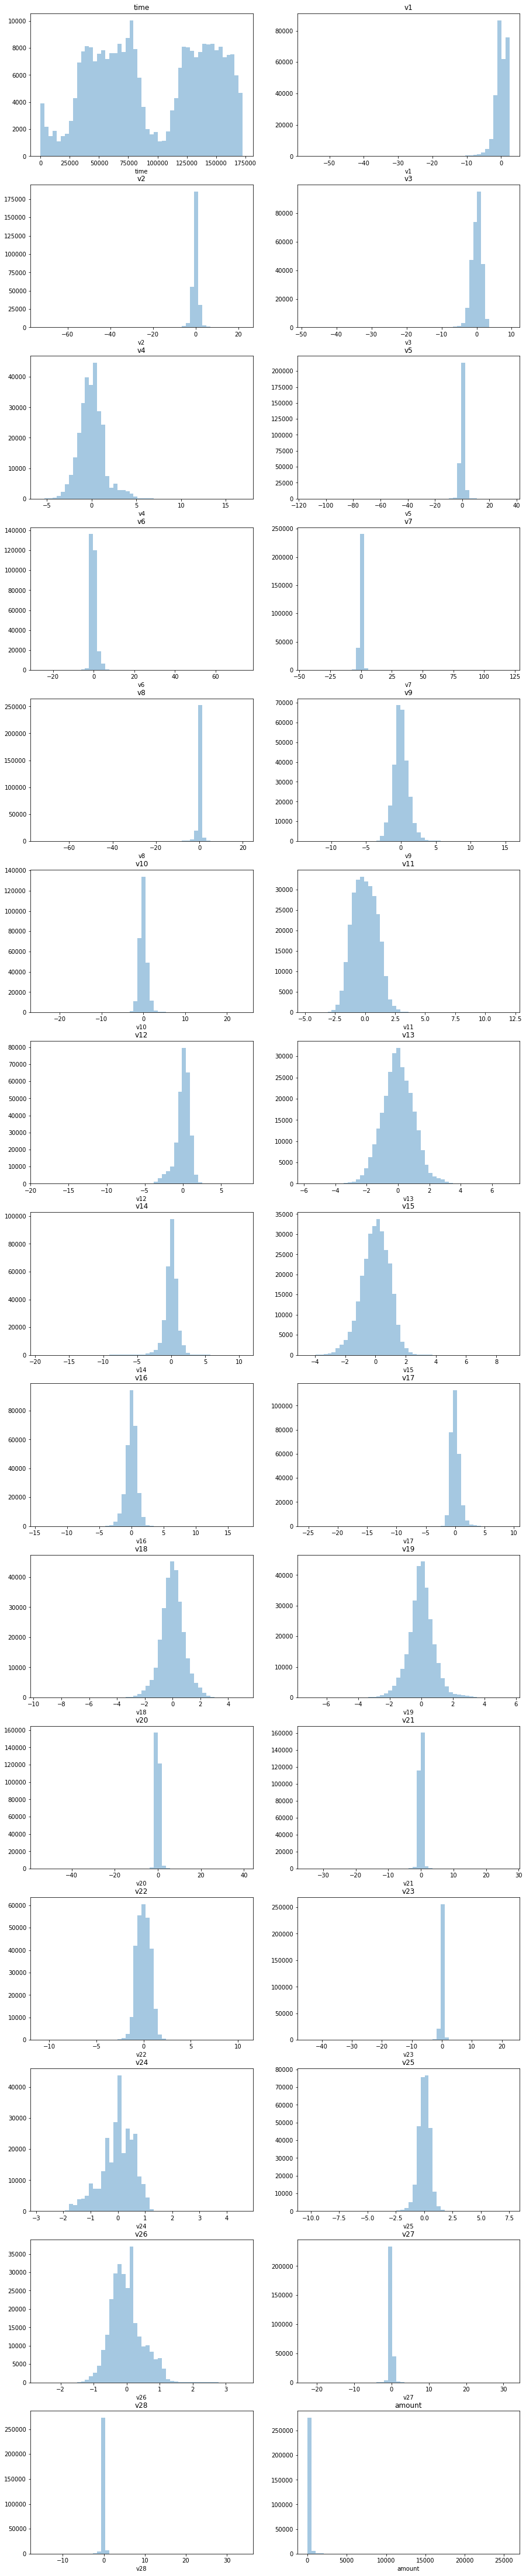

In [50]:
# Plot histograms
hist_data = dataset.dtypes == "float64"
fig = plt.figure(figsize=(15, 80))
plot_i = 1
for col in dataset.columns:
    if (hist_data[col]):
        ax = fig.add_subplot(15, 2, plot_i)
        ax.set_title(col)
        sns.distplot(dataset[col], kde = False, ax = ax)
        plot_i += 1
plt.show()

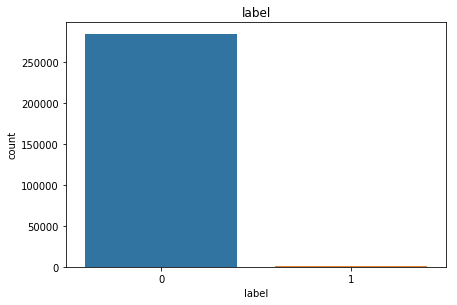

In [52]:
# Plot countplots
count_data = dataset.dtypes == "int64"
fig = plt.figure(figsize=(15, 80))
plot_i = 1
for col in dataset.columns:
    if (count_data[col]):
        ax = fig.add_subplot(15, 2, plot_i)
        ax.set_title(col)
        sns.countplot(dataset[col], ax = ax)
        plot_i += 1
plt.show()

### Missing Values Treatment

In [19]:
# Checking for NaN values
dataset.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
label     0
dtype: int64

No examples have NaN values.

In [33]:
# Checking for 0 values
(dataset == 0).astype(int).sum()

time           2
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
v9             0
v10            0
v11            0
v12            0
v13            0
v14            0
v15            0
v16            0
v17            0
v18            0
v19            0
v20            0
v21            0
v22            0
v23            0
v24            0
v25            0
v26            0
v27            0
v28            0
amount      1808
label     283253
dtype: int64

The only features that have zero values are time and amount.  Time is the amount of time in seconds after the first transaction which can be zero if the transactions occur at the same time.  Amount is the amount of money involved in a transaction.

In [21]:
# Count entries that have a 0 value for amount and is fraudulent
((dataset.amount==0).astype(int) & (dataset.label==1)).sum()

27

27 entries have a 0 transaction amount and is fraudulent.

In [22]:
# Checking for duplicate rows
dataset.duplicated().value_counts()

False    283726
True       1081
dtype: int64

There are 1081 duplicate rows in the dataset.  These duplicates will have to be dropped in the data preprocessing process.

In [24]:
# Counting labels
dataset["label"].value_counts()

0    284315
1       492
Name: label, dtype: int64

There are many more non-fraudulent transactions than fraudulent transactions.  Thus, this is an imbalanced dataset.

## IV. Data Preprocessing

In [71]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Drop duplicates (Do not want duplicates in test set)
dataset.drop_duplicates(inplace=True)

# Duplicate drop sanity check
print("Duplicates: " + str((dataset.duplicated() == True).sum()))

# Remove entries that have 0 amount?
pass

# Split features and labels
features = dataset.drop("label", axis=1)
labels = dataset[["label"]]

# Standardize data
features[features.columns] = scale(features[features.columns])

# Split data into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)

Duplicates: 0


In [75]:
from sklearn.utils import resample

def oversample(train_features, train_labels):
    # Concatenate features and labels for train set
    train_dataset = pd.concat([train_features, train_labels], axis = 1)
    
    # Get non_fraud and fraud data
    not_fraud_dataset = train_dataset[train_dataset.label == 0]
    fraud_dataset = train_dataset[train_dataset.label == 1]
    
    # Oversample fraud
    fraud_oversampled = resample(fraud_dataset, replace = True, n_samples = len(not_fraud_dataset))
    
    # Concatenate oversampled fraud with non_fraud
    train_dataset_oversampled = pd.concat([fraud_oversampled, not_fraud_dataset])
    
    # Split features and labels
    train_features_oversampled = train_dataset_oversampled.drop("label", axis=1)
    train_labels_oversampled = train_dataset_oversampled[["label"]]
    
    # Sanity check
    print(train_labels_oversampled["label"].value_counts())
    
    return (train_features_oversampled, train_labels_oversampled)